Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [1]:
NAME = "Fanni & Max D"
COLLABORATORS = "Fanni Schipek & Max Díaz I Canals"

---

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Datascience-for-Economics-Final-Assignment" data-toc-modified-id="Datascience-for-Economics-Final-Assignment-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Datascience for Economics Final Assignment</a></span></li><li><span><a href="#Research-question-(0.5-points)" data-toc-modified-id="Research-question-(0.5-points)-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Research question (0.5 points)</a></span></li><li><span><a href="#Motivation-(0.5-points)" data-toc-modified-id="Motivation-(0.5-points)-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Motivation (0.5 points)</a></span></li><li><span><a href="#Method-and-data-(1.0-point)" data-toc-modified-id="Method-and-data-(1.0-point)-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Method and data (1.0 point)</a></span></li><li><span><a href="#Preview-of-the-answers-(0.5-points)" data-toc-modified-id="Preview-of-the-answers-(0.5-points)-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Preview of the answers (0.5 points)</a></span></li><li><span><a href="#Main-assumptions-(0.5-points)" data-toc-modified-id="Main-assumptions-(0.5-points)-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Main assumptions (0.5 points)</a></span></li><li><span><a href="#Python/R-code-(6-points)" data-toc-modified-id="Python/R-code-(6-points)-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Python code (6 points)</a></span></li><li><span><a href="#Robustness-analysis-(0.5-points)" data-toc-modified-id="Robustness-analysis-(0.5-points)-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Robustness analysis (0.5 points)</a></span></li><li><span><a href="#Discussion-and-conclusion-(0.5-points)" data-toc-modified-id="Discussion-and-conclusion-(0.5-points)-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Discussion and conclusion (0.5 points)</a></span></li></ul></div>

For this problem set, we'll be using the Jupyter notebook:

![](jupyter.png)

# Datascience for Economics Final Assignment



|Name|SNR|ANR|
|----|---|----|
|F. M. Schipek|2092268|u223307|
|M. Díaz Canals|2104527|u984224|




# Research question (0.5 points)

Formulate the research question: what question do you want to answer in this assignment?

In this project we are interested in scrutinizing the possible appearance of Labour Hoarding in the European Union economy, a phenomenon specifically related to Labour Economics. It consists on the decision where firms, during periods of economic downturn or reduced demand for goods/services, prefer not to dismiss workers to match the decrease in their economic activity.

Currently there are many theoretical research papers regarding the existence of Labour Hoarding but there is not a universal stablished method to quantify it, as it is difficult to numerically compute the excess amount of workforce in a certain organization or country. The main reason for this issue to happen is that, before confirming the existence of Labour Hoarding, we should consider as well several factors for which the information is arduous to obtain or is too specific. These factors might be, for example, the following:

-High costs of hiring and firing workers. Firms would keep workers during recessions rather than firing them and recruiting new ones once there is an upswing in the activity of the organization, as the second option may result more costly.

-The fact of substituting working time for trainings, expecting in a near future to have a recovery in the economic activity and have workers more prepared and qualified to produce at a higher level than previously. We will consider this option as one of the variables in the general dataset.

-Other explanations to keep workers can be the expectations of an early recovery in the production, the maintainance of employees morale as they can be more relaxed about their situation and be more productive, and finally, the preservation of human capital created by experienced employees in the company. Specially in this case, having quantitative indicators doesn't seem objective, therefore we cannot compare between different organizations, nor easy to measure.

Therefore, we will limit the research to check about the existence of Labour Hoarding and which parameters are relevant to seek for its prevalence.

# Motivation (0.5 points)

Motivate why this question is interesting.

Given several consecutive economic recessions in recent years, Labour Hoarding might serve as a good macroeconomic indicator, overall, of how firms react to downturns. During these periods of contraction, resources are much scarcer and organisms have to make adjustments in order to survive, therefore Labour Hoarding can be seen as a counterintuitive reaction when there is a reduction in total GDP. A rational decision could be laying off as many workers as necessary in order to maintain or increase productivity.

Also it can be helpful for measuring how resilient labor markets are, the impact on workers' job security and employee protection. It provides insights into the potential consequences for workers during downturns, such as reduced income, financial stress, and career disruption. From an institutional view, Labour Hoarding helps policymakers assess the effectiveness of economic policies aimed at mitigating the negative impact of downturns, such as employment subsidies, training programs effectiveness, or measures to encourage labor market flexibility. Thus, it serves to create accurate modelings of labour market dynamics, economic forecasts and simulations.

Under the investor and financial view, Labour hoarding can have, directly or indirectly, implications for financial markets and investment decisions. Understanding the existence and magnitude of labour hoarding helps investors and analysts assess the financial health and operational efficiency of firms in various sectors.

# Method and data (1.0 point)

Which data do you have to analyze the question and what methods are you using to answer the question?

* explain where your data come from (give a link or the code to download the data if you use an API like [wbdata](https://wbdata.readthedocs.io/en/stable/));
* explain the data cleaning and data normalization steps that you use;
* make sure that the data is in your github repository as well (or explain why this is not possible) so that we can replicate your analysis.
* Motivate why you have decided to use these methods (e.g., neural network) over other methods (e.g., Lasso) in this specific context of your study.
* How is the data representative to the population of interest?

We are going to explore the data from European Union members scrapped directly from the Eurostat database. We are going to use anualized data for each country member.

In short, we are checking if there is an excess of workers for the current amount of workload. There are 2 conditions to be met:

1- PRODUCTIVITY DECLINE: there should be a decline in the productivity.

2- We assume an stochastic but constant NEGATIVE RELATION BETWEEN THE PERCENTAGE GROWTH OF GDP AND UNEMPLOYMENT. This relation should be broken in order to see signs of Labour Hoarding, i. e., a decrease of both the GDP and unemployment growth rate.

We will use this simplified version OKUN LAW formula to embody the previously mentioned relation:

$ \Delta(RealGDPGrowth)=\beta _{0}-\beta_{1}*\Delta(UnemploymentGrowth) $


## Methodology

In this project, we use three different models to estimate the presence of Labour Hoarding in the countries of the European Union. \
First, we estimate a **Lasso regression**, second, we calculate a **Ridge regression** and lastly, we evaluate a **Bayesian model**.

The rationale behing choosing the above-mentioned models is that lasso regression can help identify the covariates that have a significant impact on the relationship between GDP growth and unemployment. However, lasso regression assumes linearity, it estimates a linear regression between the variables. Ridge regression is similar to lasso, but it uses a different penalty term and better predictor when there is a multicollinearity among predictor variables. Ridge regression provides more stable estimates compared to lasso regression, as it does not force coefficients to be exactly zero, but it is not suitable for variable selection. Bayesian model (as a probabilistic approach) allows for the estimation of model parameters based on prior knowledge and observed data and it can provide posterior distributions for the model parameters. However, in a Bayesian model the results can be sensitive to the choice of priors.

To sum up, we estimate a lasso regression to select on variables, then we run a ridge regression to calculate stable point estimates and finally, we build a Bayesian model to determine the posterior distribution for the model parameters.

## Data

Loading packages that are needed to conduct both the data obtain and cleaning, and subsequently the analysis.

In [2]:
from __future__ import absolute_import, division, print_function, unicode_literals

import numpy as np
import pandas as pd
import seaborn as sn
from scipy import optimize
import pymc3 as pm
import statsmodels.api as sm # check the error that cannot import name 'factorial' in from scipy.misc import factorial
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import tensorflow as tf
import altair as alt
# from linearmodels.iv import IV2SLS
from tensorflow.keras import datasets, layers, models
from tensorflow import keras
import arviz as az

import theano
import covid19pandas as cod
country_codes = open ("country_codes.py")
from country_codes import eurostat_dictionary
import eurostat
from warnings import filterwarnings
filterwarnings('ignore')
from sklearn import datasets
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons

Define "EU_countries" variable.

In [3]:
EU_countries = ['Belgium', 'Bulgaria', 'Czechia', 'Denmark',
'Germany (until 1990 former territory of the FRG)', 'Germany','Estonia',
'Ireland', 'Greece', 'Spain', 'France', 'Croatia', 'Italy',
'Cyprus', 'Latvia', 'Lithuania', 'Luxembourg', 'Hungary', 'Malta',
'Netherlands', 'Austria', 'Poland', 'Portugal', 'Romania',
'Slovenia', 'Slovakia', 'Finland', 'Sweden', 'United Kingdom',
'Iceland', 'Liechtenstein', 'Norway', 'Switzerland',
'Bosnia and Herzegovina']

### GDP

Read [GDP](https://ec.europa.eu/eurostat/databrowser/view/NAMA_10_GDP__custom_6325511/default/table?lang=en) data from Eurostat (nama_10_gdp).

In [4]:
df_1 = eurostat.get_data_df('nama_10_gdp')
df_1.head()

,unit,na_item,geo\time,2022,2021,2020,2019,2018,2017,2016,...,1984,1983,1982,1981,1980,1979,1978,1977,1976,1975
0,CLV05_MEUR,B1G,AT,283441.0,269392.5,259083.6,277001.4,272985.2,266016.9,259996.4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,CLV05_MEUR,B1G,BA,11427.6,11080.5,10358.6,10650.6,10355.7,9978.2,9658.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,CLV05_MEUR,B1G,BE,355710.6,344637.6,325482.3,342477.2,334655.5,328736.7,323677.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,CLV05_MEUR,B1G,BG,31876.7,30816.2,28535.0,29721.9,28654.5,27691.2,26806.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,CLV05_MEUR,B1G,CH,445107.4,435957.0,418277.5,427969.5,422877.6,410565.5,405030.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Replace 'geo\time' coloumn name with 'geo' and add the country names to a new variable 'country'.

In [5]:
df_1.rename({'geo\\time':'geo'},inplace=True,axis=1)
df_1['country'] = df_1['geo'].replace(eurostat_dictionary) #replace the country names
df_1.head()

,unit,na_item,geo,2022,2021,2020,2019,2018,2017,2016,...,1983,1982,1981,1980,1979,1978,1977,1976,1975,country
0,CLV05_MEUR,B1G,AT,283441.0,269392.5,259083.6,277001.4,272985.2,266016.9,259996.4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Austria
1,CLV05_MEUR,B1G,BA,11427.6,11080.5,10358.6,10650.6,10355.7,9978.2,9658.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Bosnia and Herzegovina
2,CLV05_MEUR,B1G,BE,355710.6,344637.6,325482.3,342477.2,334655.5,328736.7,323677.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Belgium
3,CLV05_MEUR,B1G,BG,31876.7,30816.2,28535.0,29721.9,28654.5,27691.2,26806.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Bulgaria
4,CLV05_MEUR,B1G,CH,445107.4,435957.0,418277.5,427969.5,422877.6,410565.5,405030.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Switzerland


Select the EU countries from the original database and keep GDP at market prices (B1GQ) in Current prices (CP_MEUR).
Drop the coloumns that are not needed.

In [6]:
df_1 = df_1[df_1.country.isin(EU_countries) & (df_1.na_item == "B1GQ") & (df_1.unit == "CP_MEUR")] #selection on data
df_1.drop(["unit","na_item","geo"],axis=1,inplace=True) #drop some coloums
df_1.head()

,2022,2021,2020,2019,2018,2017,2016,2015,2014,2013,...,1983,1982,1981,1980,1979,1978,1977,1976,1975,country
10948,446933.3,406148.7,381042.5,397169.5,385274.1,369361.9,357608.0,344269.2,333146.1,323910.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Austria
10949,23317.3,19995.1,17755.9,18296.5,17354.2,16260.5,15474.3,14791.1,13988.3,13691.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Bosnia and Herzegovina
10950,549456.2,502521.1,459827.4,478676.1,460050.8,445050.1,430085.3,416701.4,403003.3,392880.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Belgium
10951,84560.6,71077.0,61638.9,61558.5,56224.8,52531.3,48773.1,45812.3,43026.0,42050.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Bulgaria
10952,767616.2,676775.2,648913.3,644443.2,614304.4,615776.3,621765.1,625532.7,548014.5,531729.1,...,128850.9,117591.8,100805.3,88225.0,NaN,NaN,NaN,NaN,NaN,Switzerland


Only keep the years between 2011-2022.

In [7]:
df_1.drop(np.arange(1975,2011),axis=1,inplace=True)
df_1.head()

,2022,2021,2020,2019,2018,2017,2016,2015,2014,2013,2012,2011,country
10948,446933.3,406148.7,381042.5,397169.5,385274.1,369361.9,357608.0,344269.2,333146.1,323910.2,318653.0,310128.7,Austria
10949,23317.3,19995.1,17755.9,18296.5,17354.2,16260.5,15474.3,14791.1,13988.3,13691.8,13407.5,13411.8,Bosnia and Herzegovina
10950,549456.2,502521.1,459827.4,478676.1,460050.8,445050.1,430085.3,416701.4,403003.3,392880.0,386174.7,375967.8,Belgium
10951,84560.6,71077.0,61638.9,61558.5,56224.8,52531.3,48773.1,45812.3,43026.0,42050.2,42256.8,41478.9,Bulgaria
10952,767616.2,676775.2,648913.3,644443.2,614304.4,615776.3,621765.1,625532.7,548014.5,531729.1,534012.8,515770.5,Switzerland


Move the years into rows.

In [8]:
df_1 = pd.melt(df_1,id_vars=['country'],
                        value_vars=np.arange(2011,2023),
                        var_name='year',
                        value_name='GDP') #dataframe, then give the variables that identify each row, give the values of the variables, and the coloumn name that is interesting is rate
df_1.head()

,country,year,GDP
0,Austria,2011,310128.7
1,Bosnia and Herzegovina,2011,13411.8
2,Belgium,2011,375967.8
3,Bulgaria,2011,41478.9
4,Switzerland,2011,515770.5


### Unemployment rate

Read [unemployment rate](https://ec.europa.eu/eurostat/databrowser/view/LFSA_URGAED__custom_6290035/default/table?lang=en) data from Eurostat (lfsa_urgaed).

In [9]:
df_2 = eurostat.get_data_df('lfsa_urgaed')
df_2.head()

,unit,sex,age,isced11,geo\time,2022,2021,2020,2019,2018,...,1992,1991,1990,1989,1988,1987,1986,1985,1984,1983
0,PC,F,Y15-19,ED0-2,AT,16.7,14.6,12.2,9.6,13.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,PC,F,Y15-19,ED0-2,BE,18.6,20.9,24.3,19.9,21.2,...,23.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,PC,F,Y15-19,ED0-2,BG,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,PC,F,Y15-19,ED0-2,CH,8.4,10.2,8.2,7.5,7.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,PC,F,Y15-19,ED0-2,CY,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Keep years between 2010-2022.

In [10]:
df_2.drop(np.arange(1983,2010),axis=1,inplace=True)
df_2.head()

,unit,sex,age,isced11,geo\time,2022,2021,2020,2019,2018,2017,2016,2015,2014,2013,2012,2011,2010
0,PC,F,Y15-19,ED0-2,AT,16.7,14.6,12.2,9.6,13.0,14.7,15.7,10.3,13.9,13.9,12.3,12.9,13.4
1,PC,F,Y15-19,ED0-2,BE,18.6,20.9,24.3,19.9,21.2,20.5,27.0,36.6,34.0,26.3,21.6,30.4,38.6
2,PC,F,Y15-19,ED0-2,BG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,PC,F,Y15-19,ED0-2,CH,8.4,10.2,8.2,7.5,7.6,7.9,8.3,8.5,7.9,7.9,6.2,7.7,7.8
4,PC,F,Y15-19,ED0-2,CY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Replace 'geo\time' coloumn name with 'geo' and add the country names to a new variable 'country'

In [11]:
df_2.rename({'geo\\time':'geo'},inplace=True,axis=1)
df_2['country'] = df_2['geo'].replace(eurostat_dictionary) #replace the country names
df_2.head()

,unit,sex,age,isced11,geo,2022,2021,2020,2019,2018,2017,2016,2015,2014,2013,2012,2011,2010,country
0,PC,F,Y15-19,ED0-2,AT,16.7,14.6,12.2,9.6,13.0,14.7,15.7,10.3,13.9,13.9,12.3,12.9,13.4,Austria
1,PC,F,Y15-19,ED0-2,BE,18.6,20.9,24.3,19.9,21.2,20.5,27.0,36.6,34.0,26.3,21.6,30.4,38.6,Belgium
2,PC,F,Y15-19,ED0-2,BG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Bulgaria
3,PC,F,Y15-19,ED0-2,CH,8.4,10.2,8.2,7.5,7.6,7.9,8.3,8.5,7.9,7.9,6.2,7.7,7.8,Switzerland
4,PC,F,Y15-19,ED0-2,CY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cyprus


Select the EU countries from the original database, female and male for sex, 15-74 for age category and all educational level.

In [12]:
df_2 = df_2[df_2.country.isin(EU_countries) & (df_2.sex.isin(["M","F"]) ) \
        & (df_2.unit == "PC") & (df_2.age == "Y15-74") & (df_2.isced11 == "TOTAL")] #selection on data
df_2.drop(["unit","age","isced11","geo"],axis=1,inplace=True) #drop some coloums
df_2.head()

,sex,2022,2021,2020,2019,2018,2017,2016,2015,2014,2013,2012,2011,2010,country
1421,F,4.5,6.1,5.2,4.4,4.7,5.0,5.6,5.3,5.4,5.3,4.8,4.6,4.6,Austria
1422,F,5.3,5.9,5.4,4.9,5.6,7.1,7.6,7.8,7.9,8.2,7.4,7.2,8.5,Belgium
1423,F,4.1,5.0,4.8,3.9,4.7,6.0,7.0,8.4,10.4,11.8,10.8,10.1,9.6,Bulgaria
1424,F,4.6,5.3,5.0,4.7,5.1,5.1,5.0,4.9,5.0,4.9,4.7,4.8,5.2,Switzerland
1425,F,7.7,7.9,7.6,8.0,8.8,11.3,13.4,14.8,15.1,15.2,11.1,7.7,6.4,Cyprus


Move years into rows.

In [13]:
df_2 = pd.melt(df_2,id_vars=['country','sex'],
                        value_vars=np.arange(2010,2023),
                        var_name='year',
                        value_name='Unemployment rate') #dataframe, then give the variables that identify each row, give the values of the variables, and the coloumn name that is interesting is rate
df_2.head()

,country,sex,year,Unemployment rate
0,Austria,F,2010,4.6
1,Belgium,F,2010,8.5
2,Bulgaria,F,2010,9.6
3,Switzerland,F,2010,5.2
4,Cyprus,F,2010,6.4


Define unemployment growth rate.

In [14]:
df_2['Unemployment growth rate'] = df_2.groupby(['country', 'sex'])['Unemployment rate'].pct_change() * 100
df_2

,country,sex,year,Unemployment rate,Unemployment growth rate
0,Austria,F,2010,4.6,NaN
1,Belgium,F,2010,8.5,NaN
2,Bulgaria,F,2010,9.6,NaN
3,Switzerland,F,2010,5.2,NaN
4,Cyprus,F,2010,6.4,NaN
...,...,...,...,...,...
801,Romania,M,2022,6.0,0.000000
802,Sweden,M,2022,7.0,-17.647059
803,Slovenia,M,2022,3.8,-11.627907
804,Slovakia,M,2022,5.9,-11.940299


### Labour Productivity Growth

Read [Real Labour Productivity Growth](https://ec.europa.eu/eurostat/databrowser/view/NAMA_10_LP_ULC/default/table?lang=en) per hour worked and unit labour costs from Eurostat.

In [15]:
df_3 = eurostat.get_data_df('nama_10_lp_ulc')
df_3.head()

,unit,na_item,geo\time,2022,2021,2020,2019,2018,2017,2016,...,1984,1983,1982,1981,1980,1979,1978,1977,1976,1975
0,EUR,D1_SAL_HW,AT,36.0,34.5,34.7,31.5,30.9,30.0,29.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,EUR,D1_SAL_HW,BE,44.3,42.0,41.9,39.9,39.1,38.5,37.9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,EUR,D1_SAL_HW,BG,8.7,7.4,6.7,6.1,5.7,5.2,4.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,EUR,D1_SAL_HW,CH,62.4,56.4,56.1,52.7,49.8,50.8,51.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,EUR,D1_SAL_HW,CY,15.9,15.5,15.5,14.8,14.3,14.0,13.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Replace 'geo\time' coloumn name with 'geo' and add the country names to a new variable 'country'

In [16]:
df_3.rename({'geo\\time':'geo'},inplace=True,axis=1)
df_3['country'] = df_3['geo'].replace(eurostat_dictionary)
df_3.head()

,unit,na_item,geo,2022,2021,2020,2019,2018,2017,2016,...,1983,1982,1981,1980,1979,1978,1977,1976,1975,country
0,EUR,D1_SAL_HW,AT,36.0,34.5,34.7,31.5,30.9,30.0,29.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Austria
1,EUR,D1_SAL_HW,BE,44.3,42.0,41.9,39.9,39.1,38.5,37.9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Belgium
2,EUR,D1_SAL_HW,BG,8.7,7.4,6.7,6.1,5.7,5.2,4.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Bulgaria
3,EUR,D1_SAL_HW,CH,62.4,56.4,56.1,52.7,49.8,50.8,51.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Switzerland
4,EUR,D1_SAL_HW,CY,15.9,15.5,15.5,14.8,14.3,14.0,13.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cyprus


Select the EU countries from the original, the real labour productivity rate per hour worked as base indicator and the percentage change on previous period as unit of measure.

In [17]:
df_3 = df_3[df_3.country.isin(EU_countries) & (df_3.na_item == "RLPR_HW") \
        & (df_3.unit == "PCH_PRE")] #selection on data
df_3.drop(["unit","na_item","geo"],axis=1,inplace=True) #drop some columns
df_3.head()

,2022,2021,2020,2019,2018,2017,2016,2015,2014,2013,...,1983,1982,1981,1980,1979,1978,1977,1976,1975,country
1355,1.9,-0.2,2.5,-0.1,0.5,1.2,-0.1,1.4,0.4,0.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Austria
1356,NaN,-1.1,3.2,0.8,0.2,-0.2,0.1,1.5,1.4,0.9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Belgium
1357,2.1,6.5,0.8,3.6,2.7,1.0,2.6,3.0,0.7,-0.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Bulgaria
1358,0.7,1.4,1.4,0.6,2.3,1.6,0.6,-0.7,1.0,1.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Switzerland
1359,1.5,1.7,2.1,0.9,1.0,1.3,1.0,1.3,0.0,0.9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cyprus


Keep years between 2011-2022.

In [18]:
df_3.drop(np.arange(1975,2011),axis=1,inplace=True)
df_3.head()

,2022,2021,2020,2019,2018,2017,2016,2015,2014,2013,2012,2011,country
1355,1.9,-0.2,2.5,-0.1,0.5,1.2,-0.1,1.4,0.4,0.6,1.1,1.0,Austria
1356,NaN,-1.1,3.2,0.8,0.2,-0.2,0.1,1.5,1.4,0.9,0.5,-0.7,Belgium
1357,2.1,6.5,0.8,3.6,2.7,1.0,2.6,3.0,0.7,-0.2,3.3,4.5,Bulgaria
1358,0.7,1.4,1.4,0.6,2.3,1.6,0.6,-0.7,1.0,1.8,0.4,-0.6,Switzerland
1359,1.5,1.7,2.1,0.9,1.0,1.3,1.0,1.3,0.0,0.9,0.2,0.0,Cyprus


Move years into rows.

In [19]:
df_3 = pd.melt(df_3,id_vars=['country'],
                        value_vars=np.arange(2011,2023),
                        var_name='year',
                        value_name='Real Labour Productivity Growth') #dataframe, then give the variables that identify each row, give the values of the variables, and the coloumn name that is interesting is rate
df_3.head()

,country,year,Real Labour Productivity Growth
0,Austria,2011,1.0
1,Belgium,2011,-0.7
2,Bulgaria,2011,4.5
3,Switzerland,2011,-0.6
4,Cyprus,2011,0.0


### Real GDP growth rate

Read [Real GDP growth rate](https://ec.europa.eu/eurostat/databrowser/view/TEC00115__custom_6326504/default/table?lang=en) from Eurostat.

In [20]:
df_4 = eurostat.get_data_df('tec00115')
df_4.head()

,unit,na_item,geo\time,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,CLV_PCH_PRE,B1GQ,AL,2.5,1.4,1.0,1.8,2.2,3.3,3.8,4.0,2.1,-3.5,NaN,NaN
1,CLV_PCH_PRE,B1GQ,AT,2.9,0.7,0.0,0.7,1.0,2.0,2.3,2.4,1.5,-6.5,4.6,4.9
2,CLV_PCH_PRE,B1GQ,BA,1.0,-0.8,2.3,1.2,4.3,3.2,3.2,3.8,2.9,-3.0,7.4,3.9
3,CLV_PCH_PRE,B1GQ,BE,1.7,0.7,0.5,1.6,2.0,1.3,1.6,1.8,2.3,-5.4,6.3,3.2
4,CLV_PCH_PRE,B1GQ,BG,2.1,0.8,-0.6,1.0,3.4,3.0,2.8,2.7,4.0,-4.0,7.6,3.4


Replace 'geo\time' coloumn name with 'geo' and add the country names to a new variable 'country'

In [21]:
df_4.rename({'geo\\time':'geo'},inplace=True,axis=1)
df_4['country'] = df_4['geo'].replace(eurostat_dictionary)
df_4.head()

,unit,na_item,geo,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,country
0,CLV_PCH_PRE,B1GQ,AL,2.5,1.4,1.0,1.8,2.2,3.3,3.8,4.0,2.1,-3.5,NaN,NaN,Albania
1,CLV_PCH_PRE,B1GQ,AT,2.9,0.7,0.0,0.7,1.0,2.0,2.3,2.4,1.5,-6.5,4.6,4.9,Austria
2,CLV_PCH_PRE,B1GQ,BA,1.0,-0.8,2.3,1.2,4.3,3.2,3.2,3.8,2.9,-3.0,7.4,3.9,Bosnia and Herzegovina
3,CLV_PCH_PRE,B1GQ,BE,1.7,0.7,0.5,1.6,2.0,1.3,1.6,1.8,2.3,-5.4,6.3,3.2,Belgium
4,CLV_PCH_PRE,B1GQ,BG,2.1,0.8,-0.6,1.0,3.4,3.0,2.8,2.7,4.0,-4.0,7.6,3.4,Bulgaria


Select the EU countries from the original, the real GDP growth rate as base indicator and the percentage change on previous period per capita as unit of measure.

In [22]:
df_4 = df_4[df_4.country.isin(EU_countries) & (df_4.na_item == "B1GQ") \
        & (df_4.unit == "CLV_PCH_PRE_HAB")] #selection on data
df_4.drop(["unit","na_item","geo"],axis=1,inplace=True) #drop some columns
df_4.head()

,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,country
42,2.6,0.2,-0.6,-0.1,0.0,0.7,1.6,1.9,1.1,-6.9,4.2,3.7,Austria
43,0.4,0.1,0.0,1.1,1.5,0.8,1.2,1.3,1.7,-5.8,5.8,2.4,Belgium
44,4.7,1.3,0.0,1.5,4.1,3.8,3.5,3.4,4.8,-3.4,8.5,4.2,Bulgaria
45,0.9,0.1,0.6,1.1,0.5,1.0,0.4,2.1,0.4,-3.1,3.4,1.2,Switzerland
46,-2.1,-4.9,-6.4,-0.7,4.0,6.1,4.8,4.4,4.1,-5.4,5.6,4.2,Cyprus


Move years into rows.

In [23]:
df_4 = pd.melt(df_4,id_vars=['country'],
                        value_vars=np.arange(2011,2023),
                        var_name='year',
                        value_name='Real GDP growth rate') #dataframe, then give the variables that identify each row, give the values of the variables, and the coloumn name that is interesting is rate
df_4.head()

,country,year,Real GDP growth rate
0,Austria,2011,2.6
1,Belgium,2011,0.4
2,Bulgaria,2011,4.7
3,Switzerland,2011,0.9
4,Cyprus,2011,-2.1


### Other variables included

We will use as well additional variables that could be correlated with GDP.

The first variable included is *'Total investment share of GDP'*, which consists in gross fixed capital formation (GFCF) expressed as a percentage of GDP for the government, business and households sectors. This indicator shows the investment for the total economy, government, business as well as household sectors.

Read [Total investment share of GDP](https://ec.europa.eu/eurostat/databrowser/view/sdg_08_11/default/table) data from Eurostat.

In [24]:
df_5 = eurostat.get_data_df('sdg_08_11')
df_5.head()

,unit,indic,geo\time,2000,2001,2002,2003,2004,2005,2006,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,PC,INV_BSN,AT,16.36,16.13,15.00,16.03,15.66,14.71,14.44,...,14.73,14.62,14.69,15.13,15.28,15.76,16.38,16.01,16.95,NaN
1,PC,INV_BSN,BE,14.38,14.91,13.52,13.24,14.07,14.09,14.11,...,14.37,14.59,15.01,15.41,15.43,15.52,15.95,15.80,15.60,NaN
2,PC,INV_BSN,BG,12.48,14.89,15.13,16.17,17.14,20.87,20.92,...,15.58,14.37,13.61,12.76,13.97,NaN,NaN,NaN,NaN,NaN
3,PC,INV_BSN,CH,18.67,18.29,18.54,17.61,18.09,18.22,18.51,...,17.92,18.12,18.04,18.36,18.94,18.67,18.66,18.61,NaN,NaN
4,PC,INV_BSN,CY,8.85,7.95,9.15,7.03,6.39,6.51,8.52,...,6.84,6.45,6.20,10.25,12.13,6.30,7.76,9.27,7.97,NaN


Replace 'geo\time' coloumn name with 'geo' and add the country names to a new variable 'country'

In [25]:
df_5.rename({'geo\\time':'geo'},inplace=True,axis=1)
df_5['country'] = df_5['geo'].replace(eurostat_dictionary)
df_5.head()

,unit,indic,geo,2000,2001,2002,2003,2004,2005,2006,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,country
0,PC,INV_BSN,AT,16.36,16.13,15.00,16.03,15.66,14.71,14.44,...,14.62,14.69,15.13,15.28,15.76,16.38,16.01,16.95,NaN,Austria
1,PC,INV_BSN,BE,14.38,14.91,13.52,13.24,14.07,14.09,14.11,...,14.59,15.01,15.41,15.43,15.52,15.95,15.80,15.60,NaN,Belgium
2,PC,INV_BSN,BG,12.48,14.89,15.13,16.17,17.14,20.87,20.92,...,14.37,13.61,12.76,13.97,NaN,NaN,NaN,NaN,NaN,Bulgaria
3,PC,INV_BSN,CH,18.67,18.29,18.54,17.61,18.09,18.22,18.51,...,18.12,18.04,18.36,18.94,18.67,18.66,18.61,NaN,NaN,Switzerland
4,PC,INV_BSN,CY,8.85,7.95,9.15,7.03,6.39,6.51,8.52,...,6.45,6.20,10.25,12.13,6.30,7.76,9.27,7.97,NaN,Cyprus


Select the EU countries from the original, total investment as base indicator and the percentage change on previous period as unit of measure.

In [26]:
df_5 = df_5[df_5.country.isin(EU_countries) & (df_5.indic == "INV_TOT") \
        & (df_5.unit == "PC")] #selection on data
df_5.drop(["unit","indic","geo"],axis=1,inplace=True) #drop some columns
df_5.head()

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,country
105,25.61,24.80,23.53,24.11,23.59,23.05,22.60,22.92,23.28,22.41,...,22.66,22.70,23.10,23.63,24.10,24.91,25.01,26.48,NaN,Austria
106,22.51,22.39,20.70,20.49,21.46,22.15,22.33,23.29,24.12,22.78,...,22.81,22.96,23.28,23.28,23.62,24.28,24.20,24.19,NaN,Belgium
107,16.85,19.41,19.12,19.96,21.11,25.87,27.64,28.30,33.02,27.86,...,21.08,21.01,18.57,18.52,NaN,NaN,NaN,NaN,NaN,Bulgaria
108,27.09,26.36,26.45,25.81,26.44,26.42,26.29,26.47,26.05,24.54,...,25.28,25.24,25.40,25.97,25.58,25.50,25.74,NaN,NaN,Switzerland
109,20.08,19.02,20.95,20.29,20.65,21.52,25.08,25.55,27.18,23.44,...,13.30,12.83,18.03,20.79,18.78,18.95,21.29,19.45,NaN,Cyprus


Move years into rows.

In [27]:
df_5 = pd.melt(df_5,id_vars=['country'],
                        value_vars=np.arange(2010,2023),
                        var_name='year',
                        value_name='Total investment share of GDP') #dataframe, then give the variables that identify each row, give the values of the variables, and the coloumn name that is interesting is rate
df_5.head()

,country,year,Total investment share of GDP
0,Austria,2010,21.60
1,Belgium,2010,22.12
2,Bulgaria,2010,22.21
3,Switzerland,2010,24.45
4,Cyprus,2010,22.39


Define 'Percentage change of investment relative to GDP' variable.

In [28]:
df_5['% Change of investment relative to GDP'] = df_5.groupby(['country'])['Total investment share of GDP'].pct_change() * 100
df_5.head()

,country,year,Total investment share of GDP,% Change of investment relative to GDP
0,Austria,2010,21.60,NaN
1,Belgium,2010,22.12,NaN
2,Bulgaria,2010,22.21,NaN
3,Switzerland,2010,24.45,NaN
4,Cyprus,2010,22.39,NaN


Last variable introduced is the *'Participation rate of the population in education and training'*.

Read [Participation rate in education and training](https://ec.europa.eu/eurostat/databrowser/view/TRNG_LFSE_02/default/table?lang=en) from Eurostat.

This variable covers participation in formal and non-formal education and training by people aged between 25 and 64 years old the four weeks preceding to the survey.

In [29]:
df_6 = eurostat.get_data_df('trng_lfse_02')
df_6.head()

,unit,sex,wstatus,age,geo\time,2022,2021,2020,2019,2018,...,2001,2000,1999,1998,1997,1996,1995,1994,1993,1992
0,PC,F,ACT,Y25-64,AT,19.0,17.5,13.7,17.8,18.2,...,9.0,8.8,9.7,NaN,7.9,7.3,7.2,NaN,NaN,NaN
1,PC,F,ACT,Y25-64,BE,11.7,11.1,8.0,9.1,9.4,...,7.6,7.5,7.8,5.2,3.4,3.0,3.0,2.5,2.7,2.2
2,PC,F,ACT,Y25-64,BG,1.3,1.5,1.3,1.6,1.8,...,1.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,PC,F,ACT,Y25-64,CH,25.0,25.5,29.1,34.4,33.9,...,40.0,39.5,34.2,35.5,31.4,30.1,NaN,NaN,NaN,NaN
4,PC,F,ACT,Y25-64,CY,12.0,11.0,4.5,6.6,6.8,...,4.4,4.5,3.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Keep years between 2010-2022.

In [30]:
df_6.drop(np.arange(1992,2010),axis=1,inplace=True)
df_6.head()

,unit,sex,wstatus,age,geo\time,2022,2021,2020,2019,2018,2017,2016,2015,2014,2013,2012,2011,2010
0,PC,F,ACT,Y25-64,AT,19.0,17.5,13.7,17.8,18.2,19.1,17.9,17.0,17.0,17.3,17.1,16.3,16.6
1,PC,F,ACT,Y25-64,BE,11.7,11.1,8.0,9.1,9.4,9.4,7.7,7.3,8.3,7.5,7.7,8.4,8.3
2,PC,F,ACT,Y25-64,BG,1.3,1.5,1.3,1.6,1.8,1.6,1.8,1.6,2.0,1.8,1.3,1.2,1.4
3,PC,F,ACT,Y25-64,CH,25.0,25.5,29.1,34.4,33.9,33.6,34.3,33.6,33.5,32.1,31.3,31.7,32.5
4,PC,F,ACT,Y25-64,CY,12.0,11.0,4.5,6.6,6.8,7.9,7.5,9.0,8.5,8.4,8.9,9.0,9.4


Replace 'geo\time' column name with 'geo' and add the country names to a new variable 'country'

In [31]:
df_6.rename({'geo\\time':'geo'},inplace=True,axis=1)
df_6['country'] = df_6['geo'].replace(eurostat_dictionary)
df_6.head()

,unit,sex,wstatus,age,geo,2022,2021,2020,2019,2018,2017,2016,2015,2014,2013,2012,2011,2010,country
0,PC,F,ACT,Y25-64,AT,19.0,17.5,13.7,17.8,18.2,19.1,17.9,17.0,17.0,17.3,17.1,16.3,16.6,Austria
1,PC,F,ACT,Y25-64,BE,11.7,11.1,8.0,9.1,9.4,9.4,7.7,7.3,8.3,7.5,7.7,8.4,8.3,Belgium
2,PC,F,ACT,Y25-64,BG,1.3,1.5,1.3,1.6,1.8,1.6,1.8,1.6,2.0,1.8,1.3,1.2,1.4,Bulgaria
3,PC,F,ACT,Y25-64,CH,25.0,25.5,29.1,34.4,33.9,33.6,34.3,33.6,33.5,32.1,31.3,31.7,32.5,Switzerland
4,PC,F,ACT,Y25-64,CY,12.0,11.0,4.5,6.6,6.8,7.9,7.5,9.0,8.5,8.4,8.9,9.0,9.4,Cyprus


Select the EU countries from the original, the whole population at employment status, the percentage change on previous period as unit of measure and both females and males at variable sex.

In [32]:
df_6 = df_6[df_6.country.isin(EU_countries) & (df_6.wstatus == "POP") \
        & (df_6.unit == "PC") & (df_6.sex == "T")] #selection on data
df_6.drop(["unit","age","wstatus","geo"],axis=1,inplace=True) #drop some columns
df_6.head()

,sex,2022,2021,2020,2019,2018,2017,2016,2015,2014,2013,2012,2011,2010,country
483,T,15.8,14.6,11.7,14.7,15.1,15.8,14.9,14.4,14.3,14.1,14.2,13.5,13.8,Austria
484,T,10.3,10.2,7.4,8.2,8.5,8.5,7.0,6.9,7.4,6.9,6.9,7.4,7.4,Belgium
485,T,1.7,1.8,1.6,2.0,2.5,2.3,2.2,2.0,2.1,2.0,1.7,1.6,1.6,Bulgaria
486,T,22.0,22.8,27.6,32.3,31.6,31.2,31.4,30.8,30.5,29.3,29.1,28.9,29.7,Switzerland
487,T,10.5,9.7,4.7,5.9,6.7,6.9,6.9,7.5,7.1,7.2,7.7,7.8,8.1,Cyprus


Move years into rows.

In [33]:
df_6 = pd.melt(df_6,id_vars=['country'],
                        value_vars=np.arange(2010,2023),
                        var_name='year',
                        value_name='% Percentage of population in education') #dataframe, then give the variables that identify each row, give the values of the variables, and the coloumn name that is interesting is rate
df_6.head()

,country,year,% Percentage of population in education
0,Austria,2010,13.8
1,Belgium,2010,7.4
2,Bulgaria,2010,1.6
3,Switzerland,2010,29.7
4,Cyprus,2010,8.1


Define 'Percentage change of population in education' variable.

In [34]:
df_6['% Change population in education'] = df_6.groupby(['country'])['% Percentage of population in education'].pct_change() * 100
df_6.head()

,country,year,% Percentage of population in education,% Change population in education
0,Austria,2010,13.8,NaN
1,Belgium,2010,7.4,NaN
2,Bulgaria,2010,1.6,NaN
3,Switzerland,2010,29.7,NaN
4,Cyprus,2010,8.1,NaN


## Merging data into pandas dataframe

Merge the GDP data with unemployment rate.

In [35]:
df_1=df_1.merge(df_2,how='left',left_on=['country','year'], right_on=['country','year'])
df_1.head()

,country,year,GDP,sex,Unemployment rate,Unemployment growth rate
0,Austria,2011,310128.7,F,4.6,0.000000
1,Austria,2011,310128.7,M,4.6,-8.000000
2,Bosnia and Herzegovina,2011,13411.8,NaN,NaN,NaN
3,Belgium,2011,375967.8,F,7.2,-15.294118
4,Belgium,2011,375967.8,M,7.1,-12.345679


We include the labour productivity growth in the DataFrame.

In [36]:
df_1=df_1.merge(df_3,how='left',left_on=['country','year'], right_on=['country','year'])
df_1.head()

,country,year,GDP,sex,Unemployment rate,Unemployment growth rate,Real Labour Productivity Growth
0,Austria,2011,310128.7,F,4.6,0.000000,1.0
1,Austria,2011,310128.7,M,4.6,-8.000000,1.0
2,Bosnia and Herzegovina,2011,13411.8,NaN,NaN,NaN,NaN
3,Belgium,2011,375967.8,F,7.2,-15.294118,-0.7
4,Belgium,2011,375967.8,M,7.1,-12.345679,-0.7


And finally, we include the last 3 variables left in the main dataframe.

In [37]:
df_1=df_1.merge(df_4,how='left',left_on=['country','year'], right_on=['country','year'])
df_1=df_1.merge(df_5,how='left',left_on=['country','year'], right_on=['country','year'])
df_1=df_1.merge(df_6,how='left',left_on=['country','year'], right_on=['country','year'])
df_1.head()

,country,year,GDP,sex,Unemployment rate,Unemployment growth rate,Real Labour Productivity Growth,Real GDP growth rate,Total investment share of GDP,% Change of investment relative to GDP,% Percentage of population in education,% Change population in education
0,Austria,2011,310128.7,F,4.6,0.000000,1.0,2.6,22.47,4.027778,13.5,-2.173913
1,Austria,2011,310128.7,M,4.6,-8.000000,1.0,2.6,22.47,4.027778,13.5,-2.173913
2,Bosnia and Herzegovina,2011,13411.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Belgium,2011,375967.8,F,7.2,-15.294118,-0.7,0.4,23.01,4.023508,7.4,0.000000
4,Belgium,2011,375967.8,M,7.1,-12.345679,-0.7,0.4,23.01,4.023508,7.4,0.000000


We remove from the Dataframe the countries for which we don't have data at some point. In this case, Bosnia and Herzegovina, Liechtenstein and the United Kingdom are removed.

In [38]:
df_1 = df_1.dropna()
df_1.head()
df_1['country'].unique()

array(['Austria', 'Belgium', 'Bulgaria', 'Switzerland', 'Cyprus',
       'Czechia', 'Germany', 'Denmark', 'Estonia', 'Greece', 'Spain',
       'Finland', 'France', 'Croatia', 'Hungary', 'Ireland', 'Iceland',
       'Italy', 'Lithuania', 'Luxembourg', 'Latvia', 'Malta',
       'Netherlands', 'Norway', 'Poland', 'Portugal', 'Romania', 'Sweden',
       'Slovenia', 'Slovakia'], dtype=object)

# Preview of the answers (0.5 points)

Summarize the results that you find and the answer to your research question.

Once we have ready the dataset, we can check using data visualization graphs in which periods the 2 conditions mentioned before are fulfilled, raising concern about the possibility of Labor Hoarding. Taking into consideration the average yearly percentage change in Labour Productivity and how percentage change in real GDP and unemployment rate, we can see that in 2015 Labour Productivity decreased while real GDP growth rate decreased compared to the previous year and unemployment growth rate as well decreased. Same conditions are fulfilled from 2017 to 2018 and from 2021 to 2022. These 3 different periods might be potential years in which there was Labour Hoarding.

Checking which are the main drivers in the change of real GDP growth, we can see in the Ridge regression that unemployment, investment and training growth rates respectively have certain prediction power. Running the Bayesian models, we see that the mean posteriors of the dichotomous variables whether we are considering males or females, the investment relative to GDP and the percentage change of population taking trainings have higher values. But, in terms of the percentage of variance of GDP growth rate explained by independent variables, the most relevant items are the time fixed-effects and the percentage change in the unemployment rate.

To sum up, the percentage change in the unemployment rate might have a relatively small but certain effect on the change in real GDP.

# Main assumptions (0.5 points)

What are the main assumptions that you need to answer the question with your data? For example, assumptions about missing data, random sampling, stability of the data generating process. If the aim is causal inference, then also make clear your assumptions about the random assignment of treatment (e.g. plot a DAG to illustrate your view on the causal relations between the variables).

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


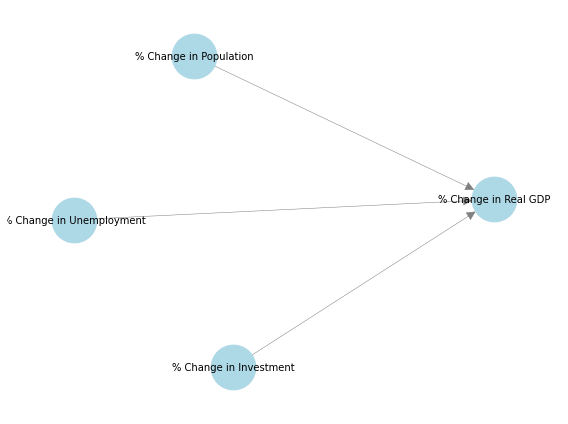

In [8]:
import networkx as nx
import matplotlib.pyplot as plt

# Create the DAG
dag = nx.DiGraph()

# Define the nodes with long names
dag.add_node('% Change in Unemployment')
dag.add_node('% Change in Investment')
dag.add_node('% Change in Population')
dag.add_node('% Change in Real GDP')

# Define the edges
dag.add_edge('% Change in Unemployment', '% Change in Real GDP')
dag.add_edge('% Change in Investment', '% Change in Real GDP')
dag.add_edge('% Change in Population', '% Change in Real GDP')

# Set figure size and font size
plt.figure(figsize=(8, 6))
font_size = 10

# Draw the DAG
pos = nx.spring_layout(dag)
nx.draw_networkx(
    dag,
    pos,
    with_labels=True,
    labels={node: node for node in dag.nodes},
    node_color='lightblue',
    node_size=2000,
    edge_color='gray',
    arrowsize=20,
    font_size=font_size,
    font_family='Arial',
    width=0.5,
)

# Adjust margins
plt.margins(0.1, 0.1)

# Show the plot
plt.axis('off')
plt.tight_layout()
plt.show()

As we are working with macroeconomic data at a country level, we should first remind the assumptions needed to consider before heading to conclusions.  First of all, we are assuming that each country has similar characteristics, in other words, we are not controlling for country fixed effects. This may limit the statistical power and generalizability of the results

We have some missing data for some countries which we are controlling for. For countries as Bosnia & Herzegovina and Liechtenstein we are missing the information for several years, specially those closer to 2011. It happens something similar with the United Kingdom, where data is not available anymore after 2019/2020 due to Brexit, as they were not members of the UE anymore. In this case, the partial information is removed from the dataset or is defined according to a Normal distribution based on prior values.

During the analysis, we will assume the existence of linearity, where Real GDP growth rate is linearly related to the independent variables. Although there may exist a certain degree of multicollinearity, there is no perfect correlation among the independent variables. As Labor Productivity Growth is computed as GDP growth divided by the number of hours worked, we will exclude it from the regressions and lasso and ridge models as we would be using a transformed version of the dependent variable as a regressor. Furthermore, we assume variables to be independent and exogenous.



# Python code (6 points)

Give the python code in code cells and use markdown cells to explain why you code things in this way and what the outcomes are of the code cells.

Create as many python and markdown cells as you need to explain things well.

## Data visualization

In order to address the first condition, we would like to check which tendencies follow the productivity growth rate for each country of the European Union, in order to see whether there is a common trend among members or there is heterogeneity.

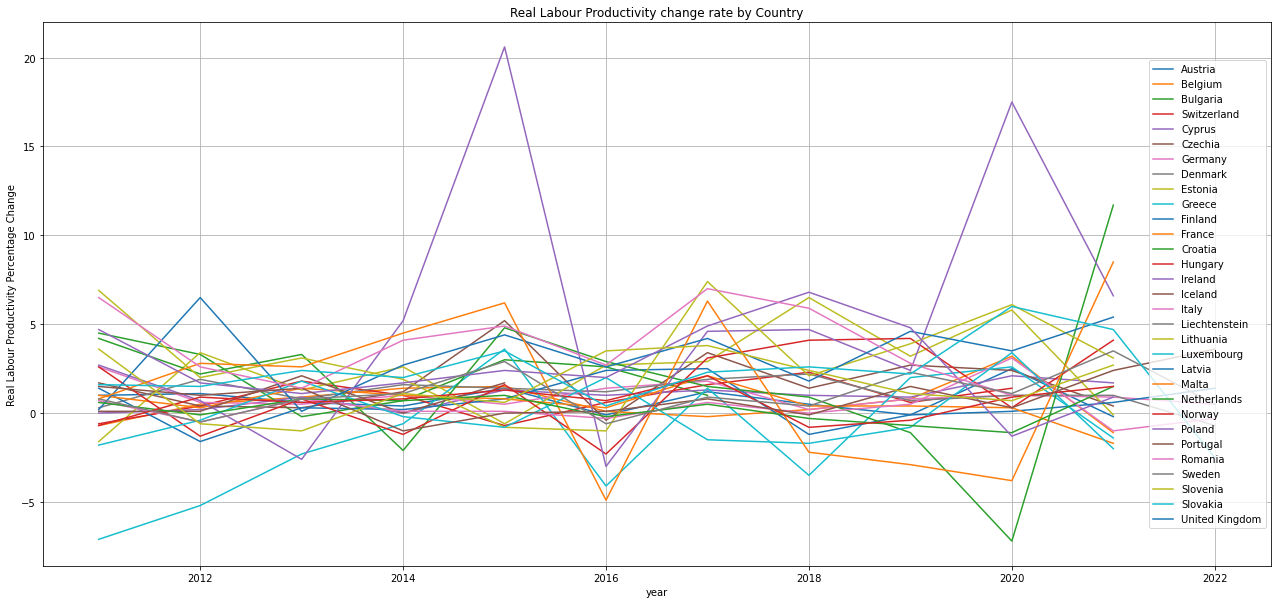

In [39]:
# Create a list of countries
countries = [
    "Austria", "Belgium", "Bulgaria", "Switzerland", "Cyprus", "Czechia", "Germany", "Denmark", "Estonia", "Greece",
    "Finland", "France", "Croatia", "Hungary", "Ireland", "Iceland", "Italy", "Liechtenstein", "Lithuania",
    "Luxembourg", "Latvia", "Malta", "Netherlands", "Norway", "Poland", "Portugal", "Romania", "Sweden", "Slovenia",
    "Slovakia", "United Kingdom"
]

# Create an empty DataFrame to store the data
df_countries = pd.DataFrame()

# Iterate over the countries and extract data into the DataFrame
for country in countries:
    country_data = df_1[df_1['country'] == country]
    df_countries = pd.concat([df_countries, country_data])

# Plotting the data
plt.figure(figsize=(22, 10))
for country in countries:
    country_data = df_countries[df_countries['country'] == country]
    plt.plot(country_data['year'], country_data['Real Labour Productivity Growth'], label=country)

plt.xlabel('year')
plt.ylabel('Real Labour Productivity Percentage Change')
plt.title('Real Labour Productivity change rate by Country')
plt.legend(loc='right')
plt.grid(True)
plt.show()

Checking on a country basis between 2011 and 2022, we can see a certain degree of heterogeneity among EU countries. As well, between 2014 and 2016, and in 2020, when Covid stroke, there are several outliers.

In 2020 we can see how differently the Labour Productivity growth reacted for each country, depending overall on the impact the Covid pandemic had on them and the policies they adopted to face it.

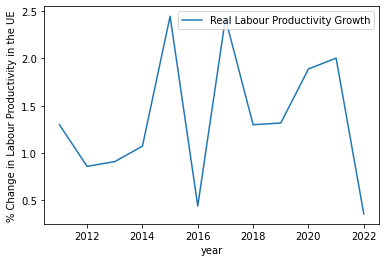

In [40]:
mean_prodgrowth = pd.DataFrame()
mean_prodgrowth = df_1.groupby('year')['Real Labour Productivity Growth'].mean().plot()
plt.ylabel('% Change in Labour Productivity in the UE')
plt.legend(loc = 'upper right')
plt.show()

Checking the EU average, we explore whether there is a decreasing trend in the Labour Productivity, fulfilling the first condition for the possibility of having Labour Hoarding. The condition is fulfilled in the following period ranges: from 2011 to 2012, from 2015 to 2016, from 2017 to 2018 and from 2021 to 2022.

Checking for the second condition to be fulfilled, we will first use plots to see whether the correlation between the change in GDP and unemployment is negative and in which proportion (by how much percentage the real GDP changes given a percentage change in unemployment) for each period.

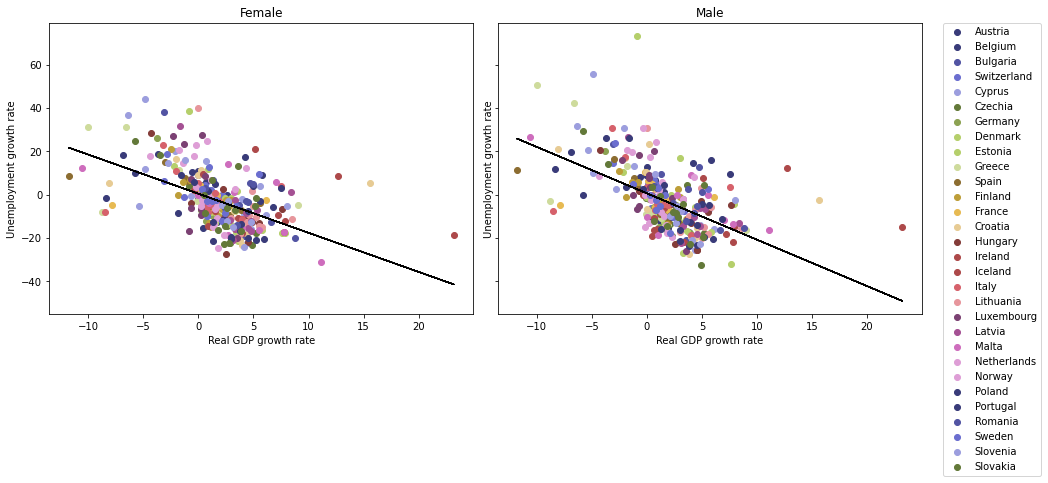

In [41]:
import matplotlib.colors as colors
import matplotlib as mpl
import matplotlib.cm as mplcm
import numpy as np
import statsmodels.api as sm

plt.style.use('seaborn-dark-palette')
NUM_COLORS = 24

cm = plt.get_cmap('tab20b')
cNorm  = colors.Normalize(vmin=0, vmax=NUM_COLORS-1)
scalarMap = mplcm.ScalarMappable(norm=cNorm, cmap=cm)

mpl.rcParams['axes.prop_cycle'] = mpl.cycler(color=([scalarMap.to_rgba(i) for i in range(NUM_COLORS)]))

fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, sharex=True,figsize=(13,5))


for country in df_1.country.unique():
    mask = (df_1.country == country)
    ax1.scatter(df_1[mask&(df_1.sex=='F')]['Real GDP growth rate'], df_1[mask&(df_1.sex=='F')]['Unemployment growth rate'], label = country)
    ax2.scatter(df_1[mask&(df_1.sex=='M')]['Real GDP growth rate'], df_1[mask&(df_1.sex=='M')]['Unemployment growth rate'], label = country)

    # Fit regression line for female
    X_female = df_1[df_1.sex == 'F']['Real GDP growth rate']
    y_female = df_1[df_1.sex == 'F']['Unemployment growth rate']
    X_female = sm.add_constant(X_female)
    model_female = sm.OLS(y_female, X_female)
    results_female = model_female.fit()
    ax1.plot(X_female['Real GDP growth rate'], results_female.predict(X_female), color='black', linewidth=1)

    # Fit regression line for male
    X_male = df_1[df_1.sex == 'M']['Real GDP growth rate']
    y_male = df_1[df_1.sex == 'M']['Unemployment growth rate']
    X_male = sm.add_constant(X_male)
    model_male = sm.OLS(y_male, X_male)
    results_male = model_male.fit()
    ax2.plot(X_male['Real GDP growth rate'], results_male.predict(X_male), color='black', linewidth=1)

ax1.set_yscale('linear')
ax1.set_xscale('linear')
ax1.set_xlabel('Real GDP growth rate')
ax2.set_xlabel('Real GDP growth rate')
ax1.set_ylabel('Unemployment growth rate')
ax2.set_ylabel('Unemployment growth rate')
ax1.set_title('Female')
ax2.set_title('Male')
plt.tight_layout()
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.);

These graphs represent the relationship between *'Real GDP growth rate'* and *'Unemployment growth rate'*. The graphs suggest an increase in real GDP growth rate with a decrease in unemployment growth rate, confirming the negative relationship.

Furthermore, visually we cannot confirm there is a different tendency among sexes.

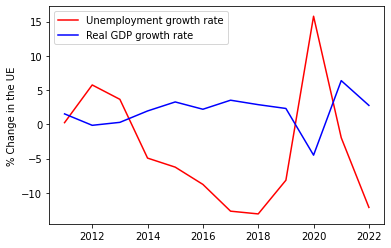

In [42]:
import matplotlib.pyplot as plt

mean_unemgrowth = df_1.groupby('year')['Unemployment growth rate'].mean()
mean_GDPgrowth = df_1.groupby('year')['Real GDP growth rate'].mean()

plt.plot(mean_unemgrowth, color='red', label='Unemployment growth rate')
plt.plot(mean_GDPgrowth, color='blue', label='Real GDP growth rate')

plt.ylabel('% Change in the UE')
plt.legend(loc='upper left')
plt.show()

## Ridge/Lasso Regression Model

To check whether potentially labor hoarding exists we will now consider the second condition, for which we are using a modified version of the Okun's Law:

$ \Delta(RealGDPGrowth)_t=\beta _{0}+\beta_{1}*\Delta(UnemploymentGrowth)_t + Other variables $


Using the previous formula as baseline, we also would like to include the rest of independent variables which may provoque changes in Real GDP.

In order to include in the regression only those variables that may be necessary based on their predictive power, we can use the Lasso model, which adds a penalty to the OLS minimization problem for having an additional parameter (not equal to zero).

### Standardizing our variables

We use masked array to define a function that standardizes our variables and can handle missing values.

In [43]:
# Prepare your data and split it into X (features) and y (target)
def standardize_ma(x):
    x_ma = np.ma.masked_invalid(x)
    return (x_ma-x_ma.mean())/x_ma.std()

X1 = standardize_ma(df_1['Real Labour Productivity Growth'])
X2 = standardize_ma(df_1['Unemployment growth rate'])
X3 = standardize_ma(df_1['% Change of investment relative to GDP'])
X4 = standardize_ma(df_1['% Change population in education'])
y = standardize_ma(df_1['Real GDP growth rate'])
X = np.column_stack((X1, X2, X3, X4))#Create a matrix X with multiple independent variables

Computing the optimal λ value will help to avoid underpenalization if the value used is excessively low, or to avoid penalty value to be very high, where variables that do affect 𝑦 should be dropped from the regression.

In [44]:
from sklearn.linear_model import Lasso, Ridge
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.metrics import mean_squared_error

# Lasso Regression
lasso = Lasso()
lasso_params = {'alpha': [0.01, 0.05, 0.1, 1, 5, 10]}  # Define a range of alpha (λ) values
lasso_grid = GridSearchCV(lasso, lasso_params, scoring='neg_mean_squared_error', cv=5)
lasso_grid.fit(X, y)

# Print the best lambda value and corresponding performance
print("Lasso Regression - Best lambda:", lasso_grid.best_params_['alpha'])
print("Lasso Regression - Best MSE:", -lasso_grid.best_score_)

# Ridge Regression
ridge = Ridge()
ridge_params = {'alpha': [0.01, 0.05, 0.1, 1, 5, 10]}  # Define a range of alpha (λ) values
ridge_grid = GridSearchCV(ridge, ridge_params, scoring='neg_mean_squared_error', cv=5)
ridge_grid.fit(X, y)

# Print the best lambda value and corresponding performance
print("Ridge Regression - Best lambda:", ridge_grid.best_params_['alpha'])
print("Ridge Regression - Best MSE:", -ridge_grid.best_score_)

Lasso Regression - Best lambda: 0.01
Lasso Regression - Best MSE: 0.5210829114019683
Ridge Regression - Best lambda: 5
Ridge Regression - Best MSE: 0.5168179319686654


In case we are using the Lasso method, the optimal λ value, out of the six options, that minimizes the standard error (MSE) of our OLS is 0,01. Therefore, the minimum penalization parameter is the most suitable one.

Applying the Ridge method, we see that the optimal λ value is 5, where penalization is higher. In this case, the variables that actually affect y might have more probabilities to be dropped out even if they should be kept.

### LASSO regression

In [45]:
X.shape

(650, 4)

In [46]:
def loss_lasso(w,λ,X,y):
    loss = np.sum((np.dot(X, w)-y)**2)/len(y) + λ * np.sum(np.abs(w))
    return loss

As X has 650 rows and 4 columns, one per independent variable, the range will be the number of rows of X, beta will have the length of the number of columns of X, which will be 5 because we added an extra column that will be the intercept of the regression.

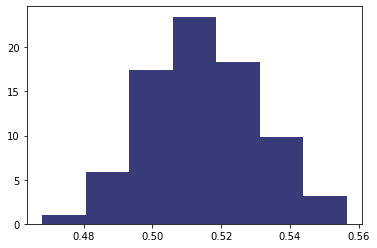

In [47]:
np.random.seed(123)

lasso_variables = []
λ = 0.01

for i in range(650):
    nrows = 650
    X = sm.add_constant(X)
    beta = np.zeros(5)
    e = np.random.random(size=nrows)
    y = np.dot(X, beta) + e
    results_las = optimize.minimize(lambda w: loss_lasso(w,λ,X,y),np.zeros(X.shape[1]))
    lasso_variables.append(np.sum(np.abs(results_las.x)))

plt.hist(lasso_variables,bins = 7,density=True);

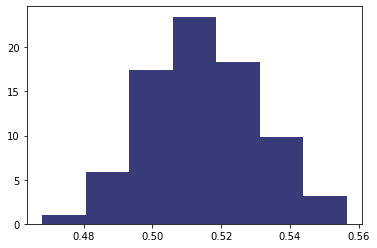

In [48]:
np.random.seed(123)

lasso_variables = []
λ = 0.01

for i in range(len(X)):
    nrows = len(X)
    X = sm.add_constant(X)
    beta = np.zeros(5)
    e = np.random.random(size=nrows)
    y = np.dot(X, beta) + e
    results_las = optimize.minimize(lambda w: loss_lasso(w,λ,X,y),np.zeros(X.shape[1]))
    lasso_variables.append(np.sum(np.abs(results_las.x)))

plt.hist(lasso_variables,bins = 7,density=True);

We just obtained a distribution of the Minimum Standard Error (MSE) for the Lasso regression, including all variables in it. We used the lambda value obtained previously, *Best lambda*, which compensated between penalizing the variables for sparsity and giving them the relevance they have related to the Real GDP growth rate.

Now we are going to ask for the independent variables coefficients in order to see which ones should be included in the regression and which ones not. If the coefficient is close to zero, generally it is recommendable to exclude the variable.

In [49]:
coefficients_las = results_las.x[1:]  # Exclude the intercept term (constant)
variable_names_las = ['X1', 'X2', 'X3', 'X4']  # Corresponding variable names

# Print the coefficient values and variable names
for coeff, var_name in zip(coefficients_las, variable_names_las):
    print(f'{var_name}: {coeff}')

X1: -2.2816569514994063e-09
X2: 0.0013697728332137107
X3: 0.015538584541529175
X4: 0.02306726815310436


We will exclude variable X1, which corresponds to Labor productivity growth rate.

In [50]:
lasso_selection = np.column_stack((X2, X3, X4))
lasso = Lasso()
lasso_params = {'alpha': [0.01, 0.05, 0.1, 1, 5, 10]}  # Define a range of alpha (λ) values
lasso_grid = GridSearchCV(lasso, lasso_params, scoring='neg_mean_squared_error', cv=5)
lasso_grid.fit(lasso_selection, y)

# Print the best lambda value and corresponding performance
print("Lasso Regression - Best lambda:", lasso_grid.best_params_['alpha'])
print("Lasso Regression - Best MSE:", -lasso_grid.best_score_)

Lasso Regression - Best lambda: 0.01
Lasso Regression - Best MSE: 0.08340990690254615


In the new Lasso regression, we excluded the percentage Labor Productivity growth due to its low predictive power to the Real GDP growth change. In this case, we observe that the optimal penalization value for lamba remained the same as before and the Mean Square Error has diminished considerably.

X2: 0.0013710386038911662
X3: 0.015541458480044061
X4: 0.023067721851312038


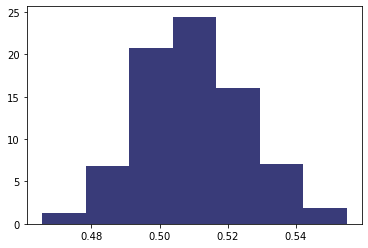

In [51]:
np.random.seed(123)

def loss_lasso2(w,λ2,lasso_selection,y):
    losslasso2 = np.sum((np.dot(lasso_selection, w)-y)**2)/len(y) + λ2 * np.sum(np.abs(w))
    return losslasso2

lasso_variables2 = []
λ2 = 0.01

for i in range(650):
    nrows = 650
    lasso_selection = sm.add_constant(lasso_selection)
    beta = np.zeros(4)
    e = np.random.random(size=nrows)
    y = np.dot(lasso_selection, beta) + e
    results2 = optimize.minimize(lambda w: loss_lasso2(w,λ2,lasso_selection,y),np.zeros(lasso_selection.shape[1]))
    lasso_variables2.append(np.sum(np.abs(results2.x)))

plt.hist(lasso_variables2,bins = 7,density=True);

coefficients2 = results2.x[1:]  # Exclude the intercept term (constant)
variable_names2 = ['X2', 'X3', 'X4']  # Corresponding variable names

# Print the coefficient values and variable names
for coeff, var_name in zip(coefficients2, variable_names2):
    print(f'{var_name}: {coeff}')

The coefficient of unemployment growth rate suggests a positive relationship between GDP growth rate and unemployment growth rate. The lasso regression drives the coefficients towards zero, leading them to be exactly zero in some cases because they are using the penalty term. Therefore, the coefficients are biased and we do not use them for interpretation.

### RIDGE regression

In this case, the Ridge method is less permissive with sparcity but functions better when multicollinearity exists between variables. The penalty term used is the optimal value obtained previously.

In [52]:
def loss_ridge(w,penalty,lasso_selection,y):
    loss3 = np.sum((np.dot(lasso_selection,w)-y)**2)/len(y) + penalty * np.sum((w)**2)
    return loss3

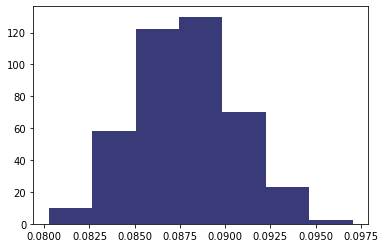

In [53]:
np.random.seed(123)

ridge_variables = []
penalty = 5

for i in range(650):
    nrows = 650
    X = sm.add_constant(lasso_selection)
    beta = np.zeros(4)
    e = np.random.random(size=nrows)
    y = np.dot(lasso_selection, beta) + e
    results3 = optimize.minimize(lambda w: loss_ridge(w,penalty,lasso_selection,y),np.zeros(lasso_selection.shape[1]))
    ridge_variables.append(np.sum(np.abs(results3.x)))

plt.hist(ridge_variables,bins = 7,density=True);

We obtained a distribution of the Minimum Standard Error (MSE) for the Ridge regression, including all variables, except Labour Productivity growth. We used the lambda value obtained previously, *Best lambda*, which compensated between penalizing the variables for sparsity and giving them the relevance they have related to the Real GDP growth rate.

In [54]:
coefficients3 = results3.x[1:]  # Exclude the intercept term (constant)
variable_names = ['X2', 'X3', 'X4']  # Corresponding variable names

# Print the coefficient values and variable names
for coeff, var_name in zip(coefficients3, variable_names):
    print(f'{var_name}: {coeff}')

X2: 0.0004389074499906205
X3: 0.003261871430379074
X4: 0.004584705131523745


Compared to lasso model, ridge regression calculates more stable point estimates. After excluding the suggested variable, we estimated the main coefficient of interest. Ridge regression estimated a lower coefficient for unemployment growth rate than lasso regression. According to the lasso regression, ridge regression shows that investment relative to GDP and % of population under training have higher predictive power than unemployment growth rate. 

## Bayesian model

As a next step, we estimate a Bayesian model. Based on the results of lasso regression, X2, X3 and X4 variables are included in the Bayesian model.

In [55]:
np.random.seed(123)

sex = df_1['sex']=='F'

with pm.Model() as normal_missing:

      ## define the prior distributions for the regression coefficients
      constant = pm.Normal('constant', mu = 0.0, sd = 1.0)
      σ_prior = 0.1

      b_unemployment = pm.Normal('b_unemployment',mu = 0, sd = σ_prior)
      b_female = pm.Normal('b_female',mu = 0, sd = σ_prior)
      b_investment = pm.Normal('b_investment',mu = 0, sd = σ_prior)
      b_education = pm.Normal('b_education',mu = 0, sd = σ_prior)


      ## missing variables (defined as observed variables with normal distributions)
      UNEMPLOYMENT = pm.Normal('UNEMPLOYMENT', mu = 0, sd = 1.0, observed = X2)
      EDUCATION = pm.Normal('EDUCATION', mu = 0, sd = 1.0, observed = X4)
      INVESTMENT = pm.Normal('INVESTMENT', mu = 0, sd = 1.0, observed = X3)


      ## model (where μ represents the mean of the Gaussian distribution for the response variable)
      μ = constant  + b_unemployment * UNEMPLOYMENT \
        + b_female * sex + b_education * EDUCATION + b_investment * INVESTMENT

      ## error term with half-normal prior distribution
      σ = pm.HalfNormal('σ', 1)

      ## the observed model (defines the Gaussian distribution for the observed response variable gdp, with mean μ and sd σ)
      gdp = pm.Normal('gdp', μ, σ, observed=y)
      trace_normal_missing = pm.sample()

## generating posterior predictive samples
with normal_missing:
      ppc_normal_missing = pm.sample_posterior_predictive(trace_normal_missing, var_names=["gdp"])

data_posterior_normal_missing = az.from_pymc3(
    trace_normal_missing,
    posterior_predictive = ppc_normal_missing)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [σ, b_education, b_investment, b_female, b_unemployment, constant]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 27 seconds.


#### Posterior distributions

In [56]:
variables = ['b_female','b_unemployment','b_investment','b_education']
az.summary(data_posterior_normal_missing.posterior,variables)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
b_female,0.014,0.022,-0.026,0.057,0.0,0.0,2729.0,3001.0,1.0
b_unemployment,0.008,0.012,-0.014,0.029,0.0,0.0,4432.0,3101.0,1.0
b_investment,0.022,0.011,0.002,0.045,0.0,0.0,3994.0,3170.0,1.0
b_education,0.028,0.011,0.007,0.049,0.0,0.0,4111.0,2330.0,1.0


This table contains a summary of the posterior distributions of the variables from the Bayesian model. It shows the point estimates (mean), measures of uncertainty (standard deviation and credible intervals), and diagnostic statistics. \
The most important measure is`r_hat`, which is approximately 1 for all variables. It measures the discrepancy between the within-chain and between-chain variances. A value close to 1 indicates that the chains have converged well and reached a stationary distribution. \
The main coefficient of interest is the point estimate of the unemployment growth rate. One percentage point increase in unemployment growth rate shows an expected 0.008 percentage point increase in GDP growth rate, considering the available data and the prior information incorporated into the analysis. The Highest Density Interval (HDI) spans both positive and negative values for unemployment growth rate, suggesting that there is uncertainty regarding the true value of the coeffient. Furthermore, as HDI contains zero, the coefficient of unemployment growth rate may be close to zero, demonstrating a weak evidence for GDP growth rate.

#### Trace plots

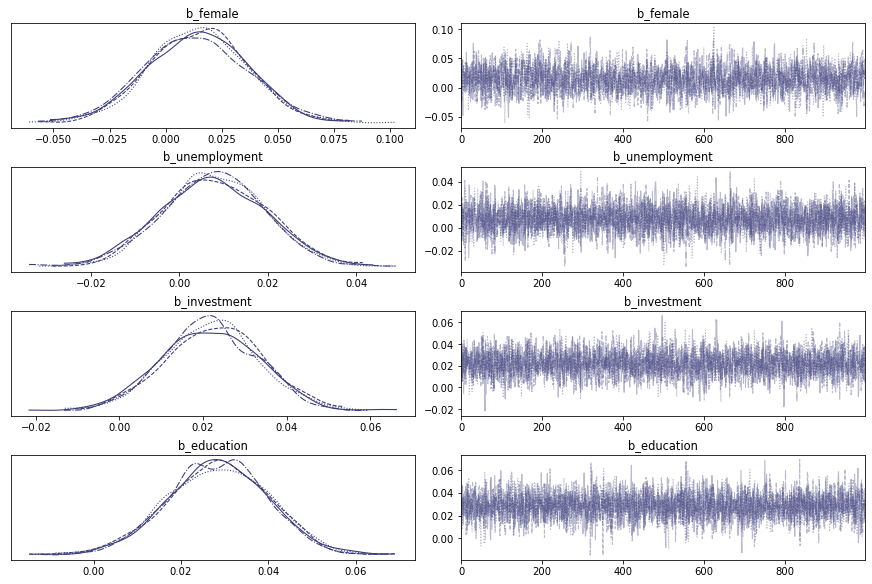

In [57]:
az.plot_trace(trace_normal_missing,var_names=variables);

On the left, the plots show the estimated density of the samples. On the right, we can see the posterior parameter trace plots, the trace of the samples over iterations. The sampling worked well, the trace plots look stationary, they do not have any upwards or downwards trends. Furthermore, there is good mixing which translates into the condensed zig-zagging of the trace and the different chains cover the same regions.

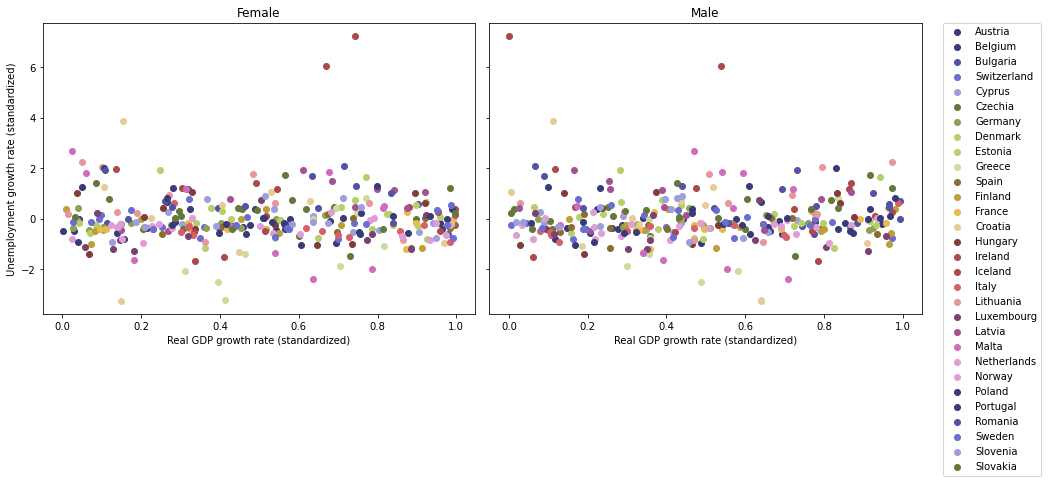

In [58]:
female = (df_1.sex=='F')
male = (df_1.sex=='M')
percentiles = np.percentile(data_posterior_normal_missing.posterior_predictive.gdp,[2.5,97.5],axis=[0,1])

plt.style.use('seaborn-dark-palette')
NUM_COLORS = 24

cm = plt.get_cmap('tab20b')
cNorm  = colors.Normalize(vmin=0, vmax=NUM_COLORS-1)
scalarMap = mplcm.ScalarMappable(norm=cNorm, cmap=cm)
mpl.rcParams['axes.prop_cycle'] = mpl.cycler(color=([scalarMap.to_rgba(i) for i in range(NUM_COLORS)]))
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, sharex=True,figsize=(13,5))

for country in df_1.country.unique():
    mask = (df_1.country == country)
    ax1.scatter(y[mask&(df_1.sex=='F')], X1[mask&(df_1.sex=='F')], label = country)
    ax2.scatter(y[mask&(df_1.sex=='M')], X1[mask&(df_1.sex=='M')], label = country)

ax1.set_xlabel('Real GDP growth rate (standardized)')
ax2.set_xlabel('Real GDP growth rate (standardized)')
ax1.set_ylabel('Unemployment growth rate (standardized)')
ax1.set_title('Female')
ax2.set_title('Male')
plt.tight_layout()
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.);

# Robustness analysis (0.5 points)

How robust are your results? Think of things like:

* analyzing outliers in the data
* running different specification of regression, neural network etc.
* splitting data in train, validation and test data.

For robustness check, we run different specifications of the Bayesian model to calculate posterior distributions of the variables. Furthermore, we run a simple ordinary least square (OLS) regression to check the correlation between unemployment growth rate and GDP growth rate.

The first specification of the Bayesian model contains one independent variable only: unemployment growth rate.

In [59]:
np.random.seed(123)

sex = df_1['sex']=='F'

with pm.Model() as normal_missing:

      ## define the prior distributions for the regression coefficients
      constant = pm.Normal('constant', mu = 0.0, sd = 1.0)
      σ_prior = 0.1

      b_unemployment = pm.Normal('b_unemployment',mu = 0, sd = σ_prior)
      b_female = pm.Normal('b_female',mu = 0, sd = σ_prior)


      ## missing variables (defined as observed variables with normal distributions)
      UNEMPLOYMENT = pm.Normal('UNEMPLOYMENT', mu = 0, sd = 1.0, observed = X2)

      ## model (where μ represents the mean of the Gaussian distribution for the response variable)
      μ = constant  + b_unemployment * UNEMPLOYMENT \
        + b_female * sex

      ## error term with half-normal prior distribution
      σ = pm.HalfNormal('σ', 1)

      ## the observed model (defines the Gaussian distribution for the observed response variable gdp, with mean μ and sd σ)
      gdp = pm.Normal('gdp', μ, σ, observed=y)
      trace_normal_missing = pm.sample()

## generating posterior predictive samples
with normal_missing:
      ppc_normal_missing = pm.sample_posterior_predictive(trace_normal_missing, var_names=["gdp"])

data_posterior_normal_missing = az.from_pymc3(
    trace_normal_missing,
    posterior_predictive = ppc_normal_missing)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [σ, b_female, b_unemployment, constant]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 21 seconds.


In [60]:
variables = ['b_female','b_unemployment']
az.summary(data_posterior_normal_missing.posterior,variables)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
b_female,0.014,0.022,-0.028,0.056,0.0,0.0,2795.0,2657.0,1.0
b_unemployment,0.002,0.012,-0.020,0.023,0.0,0.0,3388.0,2872.0,1.0


Compared to the original model, the point estimate of the unemployment growth rate is lower (0.002). One percentage point increase in unemployment growth rate shows an expected 0.002 percentage point increase in GDP growth rate, considering the available data and the prior information incorporated into the analysis. The Highest Density Interval (HDI) spans both positive and negative values for unemployment growth rate, demonstrating a weak evidence for GDP growth rate.

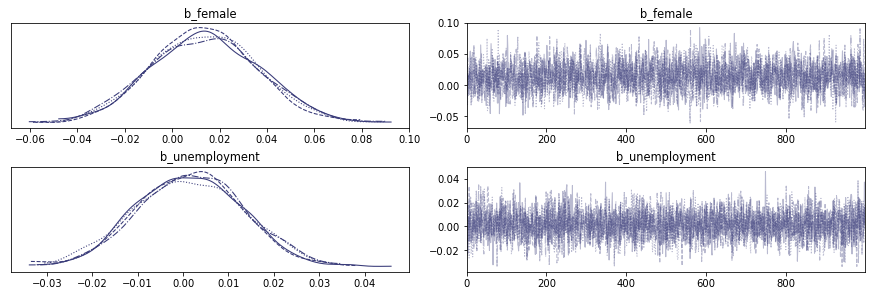

In [61]:
az.plot_trace(trace_normal_missing,var_names=variables);

The trace plots look stationary, similary to the previous ones.

The next specification of the Bayesian model contains time-fixed effects next to unemployment growth rate.

In [62]:
import pymc3 as pm
np.random.seed(123)

sex = df_1['sex'] == 'F'

with pm.Model() as normal_missing:
    # Define the prior distributions for the regression coefficients
    constant = pm.Normal('constant', mu=0.0, sd=1.0)
    σ_prior = 0.1


    b_unemployment = pm.Normal('b_unemployment',mu = 0, sd = σ_prior)
    b_female = pm.Normal('b_female',mu = 0, sd = σ_prior)


   ## missing variables (defined as observed variables with normal distributions)
    UNEMPLOYMENT = pm.Normal('UNEMPLOYMENT', mu = 0, sd = 1.0, observed = X2)

    # Time fixed effects
    time_effects = pm.Normal('time_effects', mu=0, sd=σ_prior, shape= 650)
    time_fixed_effects = pm.Data('time_fixed_effects', np.zeros(650))

    ## missing variables (defined as observed variables with normal distributions)
   #Variables missing variables are already defined previously.

    ## model (where μ represents the mean of the Gaussian distribution for the response variable)
    μ1 = constant + b_unemployment * UNEMPLOYMENT + b_female * sex  \
         + pm.math.dot(time_effects, time_fixed_effects)

    ## error term with half-normal prior distribution
    σ = pm.HalfNormal('σ', 1)

    ## the observed model (defines the Gaussian distribution for the observed response variable gdp, with mean μ and sd σ)
    gdp = pm.Normal('gdp', μ1, σ, observed=y)
    trace_normal_missing = pm.sample()

# generating posterior predictive samples
with normal_missing:
    ppc_normal_missing = pm.sample_posterior_predictive(trace_normal_missing, var_names=["gdp"])

data_posterior_normal_missing = az.from_pymc3(
    trace_normal_missing,
    posterior_predictive=ppc_normal_missing)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [σ, time_effects, b_female, b_unemployment, constant]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 49 seconds.


In [63]:
variables = ['b_female','b_unemployment']
az.summary(data_posterior_normal_missing.posterior,variables)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
b_female,0.014,0.022,-0.027,0.057,0.0,0.0,2550.0,2485.0,1.0
b_unemployment,0.001,0.011,-0.020,0.023,0.0,0.0,3585.0,2494.0,1.0


The point estimate of the unemployment growth rate is even lower (0.001) in this model than in the previous one. One percentage point increase in unemployment growth rate shows an expected 0.001 percentage point increase in GDP growth rate, considering the available data and the prior information incorporated into the analysis. The Highest Density Interval (HDI) spans both positive and negative values for unemployment growth rate, demonstrating a weak evidence for GDP growth rate.

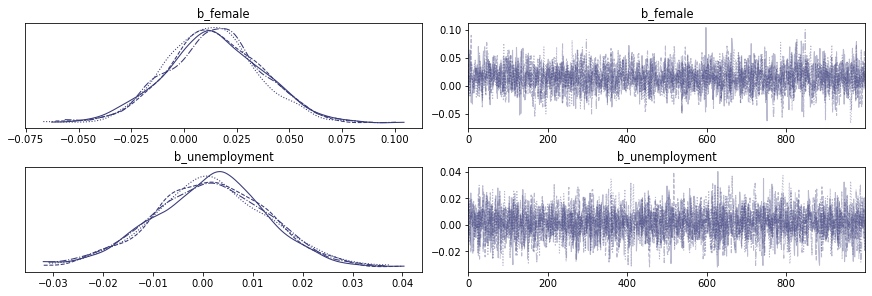

In [64]:
az.plot_trace(trace_normal_missing,var_names=variables);

The trace plots look stationary, similary to the previous ones.

### Alternative explanation to Labour Hoarding

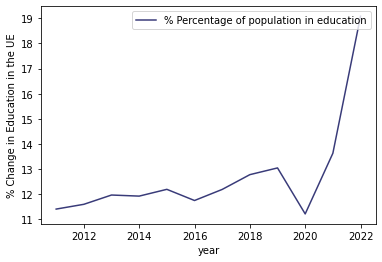

In [65]:
mean_edugrowth = pd.DataFrame()
mean_edugrowth = df_1.groupby('year')['% Percentage of population in education'].mean().plot()
plt.ylabel('% Change in Education in the UE')
plt.legend(loc = 'upper right')
plt.show()

Apparently it appears to exist an increasing tendency in  the percentage of population aged between 25 and 64 years old that are undergoing further education and trainings. It can be relevant as individuals and firms might be working less time or simply not working, from which we can deduct they are not being productive, but in reality they are investing in further formation to increase their performance in the future.

Since 2011 there is a moderately year-by-year percentage increase in the population having suplementary formation until 2019. In 2020 the percentage increase in formation slowed down from a 13% increase in the previous year to an 11.5% approximately in 2020, caused perhaps by the budget limitation of individuals/companies and general economic activity shrinkage.

Two years later, the percentage increase comparing 2021 to 2022 was 19%, the highest undoubtedly. In case of a sharp decrease in GDP and not as sharp increase in unemployment, it could be a reason to deny the existence of Labour Hoarding in this period of time. Nevertheless, we have no means to prove and measure to which extend trainings and education have substituted working hours.

## OLS regression

We estimate 3 OLS regression models to check the correlation between GDP growth rate and unemployment growth rate. The first model contains only one independent variable: unemployment growth rate. The second model contains time-fixed effects nex to unemployment growth rate. The third model contains 2 additional control variables: % Change population in education, % Change of investment relative to GDP compared to the second model.

In [66]:
# Specify the dependent variable (y) and independent variables (X)
y_nonstd = df_1['Real GDP growth rate']
X_nonstd1 = df_1[['Unemployment growth rate']]

# Add a constant term to the independent variables
X_nonstd1 = sm.add_constant(X_nonstd1)

# Perform the OLS regression
model1 = sm.OLS(y_nonstd, X_nonstd1)
results_ols1 = model1.fit()

# Print the regression summary
print(results_ols1.summary())

                             OLS Regression Results                             
Dep. Variable:     Real GDP growth rate   R-squared:                       0.280
Model:                              OLS   Adj. R-squared:                  0.279
Method:                   Least Squares   F-statistic:                     252.0
Date:                  Tue, 13 Jun 2023   Prob (F-statistic):           3.55e-48
Time:                          10:33:40   Log-Likelihood:                -1658.3
No. Observations:                   650   AIC:                             3321.
Df Residuals:                       648   BIC:                             3329.
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
cons

In [67]:
# Specify the dependent variable (y) and independent variables (X)
y_nonstd = df_1['Real GDP growth rate']
X_nonstd2 = df_1[['Unemployment growth rate']]

# Add time fixed effects as dummy variables
time_effects = pd.get_dummies(df_1['year'], prefix='Year', drop_first=True)
X_nonstd2 = pd.concat([X_nonstd2, time_effects], axis=1)

# Add a constant term to the independent variables
X_nonstd2 = sm.add_constant(X_nonstd2)

# Perform the OLS regression
model2 = sm.OLS(y_nonstd, X_nonstd2)
results_ols2 = model2.fit()

# Print the regression summary
print(results_ols2.summary())

                             OLS Regression Results                             
Dep. Variable:     Real GDP growth rate   R-squared:                       0.540
Model:                              OLS   Adj. R-squared:                  0.531
Method:                   Least Squares   F-statistic:                     62.29
Date:                  Tue, 13 Jun 2023   Prob (F-statistic):           5.50e-99
Time:                          10:33:40   Log-Likelihood:                -1512.7
No. Observations:                   650   AIC:                             3051.
Df Residuals:                       637   BIC:                             3110.
Df Model:                            12                                         
Covariance Type:              nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
cons

In [68]:
# Specify the dependent variable (y) and independent variables (X)
y_nonstd = df_1['Real GDP growth rate']
X_nonstd3 = df_1[['% Change population in education', '% Change of investment relative to GDP',
          'Unemployment growth rate']]

# Add time fixed effects as dummy variables
X_nonstd3 = pd.concat([X_nonstd3, time_effects], axis=1)

# Add a constant term to the independent variables
X_nonstd3 = sm.add_constant(X_nonstd3)

# Perform the OLS regression
model3 = sm.OLS(y_nonstd, X_nonstd3)
results_ols3 = model3.fit()

# Print the regression summary
print(results_ols3.summary())

                             OLS Regression Results                             
Dep. Variable:     Real GDP growth rate   R-squared:                       0.546
Model:                              OLS   Adj. R-squared:                  0.536
Method:                   Least Squares   F-statistic:                     54.57
Date:                  Tue, 13 Jun 2023   Prob (F-statistic):           4.97e-99
Time:                          10:33:40   Log-Likelihood:                -1508.3
No. Observations:                   650   AIC:                             3047.
Df Residuals:                       635   BIC:                             3114.
Df Model:                            14                                         
Covariance Type:              nonrobust                                         
                                             coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------

The following table summarises the main coefficient of interest (unemployment growth rate):
    
|Model|Coefficient|
|-----|-----------|
|Model 1|-0.1421|
|Model 2|-0.0890|
|Model 3|-0.0844|

The estimates are statistically significant at all significance levels. All of the models suggest negative correlation between GDP growth rate and unemployment growth rate. After involving time-fixed effects, the estimation becomes smaller in absolute terms. The estimations range between -0.0844 and -0.1421, meaning that one percentage point increase in unemployment growth rate results in a decrease - ranges between -0.0844 and -0.1421 - in GDP growth rate on average, while holding everything else constant.

# Discussion and conclusion (0.5 points)

What did you find in the analysis above; what is the answer to the question you started out with.

What are weaknesses of your approach that can be improved upon in future research (e.g. in your thesis).



To conclude, our analysis focused on the potential appearance of Labor Hoarding in the countries of European Union. Despite the lack of a universally accepted approach for quantifying Labour Hoarding, our study showed some significant aspects that lead to its prevalence. The findings highlight the complexities of labor hoarding and the difficulties in quantifying and comparing it across different organizations. 

We estimated the relationship between real GDP growth rate and unemployment growth rate, while controlling for other factors such as real labor productivity growth rate, % change in total investment share of GDP, and % change in population in education using models such as lasso and ridge regressions as well as Bayesian model. We were able to demonstrate the complex dynamics and potential trade-offs connected with Labor Hoarding employing these modeling tools. Future study in this area can concentrate on improving the models and exploring additional variables to better understand Labor Hoarding and its consequences for economic stability and labor market dynamics.

Our study has certain weaknesses that should be taken into consideration. Firstly, the study's time range is quite limited, reaching just up to 2011. This constraint stems from data availability, and it limits our ability to capture longer-term patterns or investigate potential changes beyond this time frame. As a result, the findings may not accurately reflect the dynamics and variations that may have occurred in the following years. Secondly, it is critical to emphasize that the analysis does not take into account country-fixed effects. This assumption indicates that all of the countries in the sample have similar characteristics even though it might not be true. Failure to adjust for these fixed variables can introduce bias or confounding into the results, thereby reducing their accuracy and generalizability.